In [1]:
import pandas as pd

In [2]:
Data = 'C:/Users/patel/lighthouse-lab-allprojects/Mid-Project-Data/Model_Final_1.csv'

In [3]:
df = pd.read_csv(Data, low_memory=False)

In [4]:
df.columns

Index(['arr_delay', 'crs_arr_time', 'fl_date_day_of_month', 'day_of_week',
       'origin_city_avg_dep_delay', 'origin_day_week_avg_dep_delay',
       'dest_day_week_avg_arr_delay', 'dest_city_avg_arr_delay',
       'op_unique_carrier_day_week_avg_arr_delay',
       'distance_group_airtime_avg', 'distance_group__day_passenger_avg',
       'distance_group_day_payload_avg'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974084 entries, 0 to 2974083
Data columns (total 12 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   arr_delay                                 float64
 1   crs_arr_time                              int64  
 2   fl_date_day_of_month                      int64  
 3   day_of_week                               object 
 4   origin_city_avg_dep_delay                 float64
 5   origin_day_week_avg_dep_delay             float64
 6   dest_day_week_avg_arr_delay               float64
 7   dest_city_avg_arr_delay                   float64
 8   op_unique_carrier_day_week_avg_arr_delay  float64
 9   distance_group_airtime_avg                float64
 10  distance_group__day_passenger_avg         float64
 11  distance_group_day_payload_avg            float64
dtypes: float64(9), int64(2), object(1)
memory usage: 272.3+ MB


In [6]:
categories = df.dtypes[df.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df[categories])
df = pd.concat([df, df_dummy], axis=1)
df = df.drop(columns=categories)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974084 entries, 0 to 2974083
Data columns (total 18 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   arr_delay                                 float64
 1   crs_arr_time                              int64  
 2   fl_date_day_of_month                      int64  
 3   origin_city_avg_dep_delay                 float64
 4   origin_day_week_avg_dep_delay             float64
 5   dest_day_week_avg_arr_delay               float64
 6   dest_city_avg_arr_delay                   float64
 7   op_unique_carrier_day_week_avg_arr_delay  float64
 8   distance_group_airtime_avg                float64
 9   distance_group__day_passenger_avg         float64
 10  distance_group_day_payload_avg            float64
 11  day_of_week_Friday                        uint8  
 12  day_of_week_Monday                        uint8  
 13  day_of_week_Saturday                      uint8  
 14  da

In [8]:
import random

In [9]:

# Get a random sample of 1000 rows
df = df.sample(n=100000)

# Reset the index of the new dataframe
df = df.reset_index(drop=True)


In [10]:
y = df['arr_delay']

In [11]:
x = df.drop('arr_delay', axis=1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [14]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (80000, 17)
X_test shape: (20000, 17)


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error



# Create the Ridge regression model
ridge = Ridge()

# Define the parameter grid for Ridge regression
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Perform the grid search for Ridge regression
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(x, y)

# Retrieve the best model and best parameter for Ridge regression
best_ridge_model = ridge_grid_search.best_estimator_
best_ridge_alpha = ridge_grid_search.best_params_['alpha']

# Create the Lasso regression model
lasso = Lasso()

# Define the parameter grid for Lasso regression
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Perform the grid search for Lasso regression
lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(x,y)

# Retrieve the best model and best parameter for Lasso regression
best_lasso_model = lasso_grid_search.best_estimator_
best_lasso_alpha = lasso_grid_search.best_params_['alpha']

# Print the best parameters and best mean squared error for Ridge and Lasso regressions
print("Best alpha for Ridge regression:", best_ridge_alpha)
print("Best alpha for Lasso regression:", best_lasso_alpha)
print("Best mean squared error for Ridge regression:", -ridge_grid_search.best_score_)
print("Best mean squared error for Lasso regression:", -lasso_grid_search.best_score_)

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.7282e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.76564e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.72451e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.73673e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216

Best alpha for Ridge regression: 10.0
Best alpha for Lasso regression: 0.1
Best mean squared error for Ridge regression: 2331.9914636271724
Best mean squared error for Lasso regression: 2332.42623882772


# ridge_model

In [63]:
model = Ridge(alpha=10)

In [64]:
model.fit(X_train, y_train)

Ridge(alpha=10)

In [65]:
y_pred = model.predict(X_test)

In [66]:
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error



In [67]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2100.9097275610557


In [20]:
from sklearn.metrics import r2_score

In [69]:
R2_lr = r2_score (y_test, y_pred)

In [70]:
R2_lr

0.03174939338229499

# Esembel Techniques

In [16]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


In [17]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest MSE:", rf_mse)

Random Forest MSE: 1909.1760774350003


In [22]:
# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Gradient Boosting MSE:", gb_mse)


Gradient Boosting MSE: 2297.6377097961185


In [23]:
# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print("XGBoost MSE:", xgb_mse)

XGBoost MSE: 2224.4991108699696


Random Forest with lowest MSE

In [21]:
R2_lr = r2_score (y_test, rf_predictions)

In [22]:
R2_lr

0.10319376533141655

# Decision Tree Classifier with criterion gini index

In [77]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) #Descition Tree model


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [78]:
y_pred_gini = clf_gini.predict(X_test) #Prediction

In [79]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.0296


In [81]:
import matplotlib.pyplot as plt

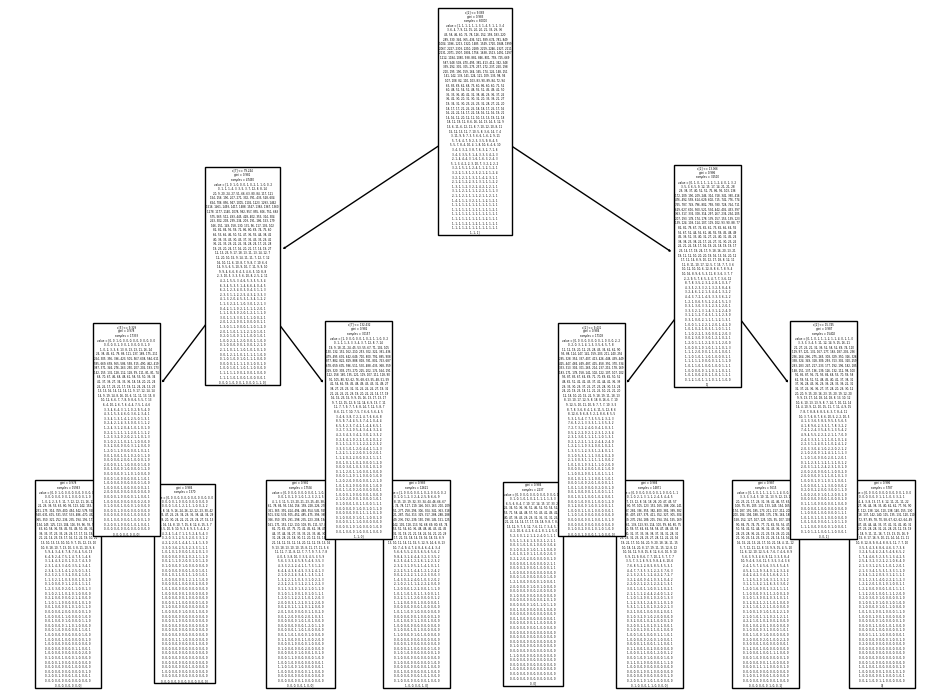

In [82]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) ;

# linear_regression

In [15]:
import statsmodels.api as sm
X = sm.add_constant(x)

In [16]:
lin_reg = sm.OLS(y,X)

In [17]:
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     201.2
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        12:25:25   Log-Likelihood:            -5.2816e+05
No. Observations:              100000   AIC:                         1.056e+06
Df Residuals:                   99983   BIC:                         1.057e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [26]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)


LinearRegression()

In [27]:
regressor.score(X,y)

0.03167221057942038

# Test dat Prediction

In [23]:
# Data Path
Data = "C:/Users/patel/lighthouse-lab-allprojects/Mid-Project-Data/Flights_test_clean_final.csv"

In [24]:
df = pd.read_csv(Data, low_memory=False)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627311 entries, 0 to 627310
Data columns (total 18 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   fl_date                                   627311 non-null  object 
 1   mkt_carrier                               627311 non-null  object 
 2   mkt_carrier_fl_num                        627311 non-null  int64  
 3   op_unique_carrier                         627311 non-null  object 
 4   crs_arr_time                              627311 non-null  int64  
 5   fl_date_day_of_month                      627311 non-null  int64  
 6   distance_group                            627311 non-null  int64  
 7   origin                                    627311 non-null  object 
 8   dest                                      627311 non-null  object 
 9   day_of_week                               627311 non-null  object 
 10  origin_city_avg_dep_

In [26]:
df.columns

Index(['fl_date', 'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier',
       'crs_arr_time', 'fl_date_day_of_month', 'distance_group', 'origin',
       'dest', 'day_of_week', 'origin_city_avg_dep_delay',
       'origin_day_week_avg_dep_delay', 'dest_day_week_avg_arr_delay',
       'dest_city_avg_arr_delay', 'op_unique_carrier_day_week_avg_arr_delay',
       'distance_group_airtime_avg', 'distance_group__day_passenger_avg',
       'distance_group_day_payload_avg'],
      dtype='object')

In [27]:
df1 = df.drop(['fl_date', 'op_unique_carrier','distance_group', 'mkt_carrier', 'mkt_carrier_fl_num','origin',
       'dest',], axis=1)

In [28]:
categories = df1.dtypes[df1.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df1[categories])
df1 = pd.concat([df1, df_dummy], axis=1)
df1 = df1.drop(columns=categories)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627311 entries, 0 to 627310
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   crs_arr_time                              627311 non-null  int64  
 1   fl_date_day_of_month                      627311 non-null  int64  
 2   origin_city_avg_dep_delay                 627311 non-null  float64
 3   origin_day_week_avg_dep_delay             627311 non-null  float64
 4   dest_day_week_avg_arr_delay               627311 non-null  float64
 5   dest_city_avg_arr_delay                   627311 non-null  float64
 6   op_unique_carrier_day_week_avg_arr_delay  627311 non-null  float64
 7   distance_group_airtime_avg                627311 non-null  float64
 8   distance_group__day_passenger_avg         627311 non-null  float64
 9   distance_group_day_payload_avg            627311 non-null  float64
 10  day_of_week_Friday  

In [30]:
y_pred = rf.predict(df1)

In [31]:
y_pred

array([ 11.93,  20.38,   7.03, ..., 146.25,  42.05,  -2.85])

In [32]:
df['pred_arr_delay'] = y_pred

In [33]:
df.columns

Index(['fl_date', 'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier',
       'crs_arr_time', 'fl_date_day_of_month', 'distance_group', 'origin',
       'dest', 'day_of_week', 'origin_city_avg_dep_delay',
       'origin_day_week_avg_dep_delay', 'dest_day_week_avg_arr_delay',
       'dest_city_avg_arr_delay', 'op_unique_carrier_day_week_avg_arr_delay',
       'distance_group_airtime_avg', 'distance_group__day_passenger_avg',
       'distance_group_day_payload_avg', 'pred_arr_delay'],
      dtype='object')

In [35]:
df = df.drop([ 'op_unique_carrier',
       'crs_arr_time', 'fl_date_day_of_month', 'distance_group', 'day_of_week', 'origin_city_avg_dep_delay',
       'origin_day_week_avg_dep_delay', 'dest_day_week_avg_arr_delay',
       'dest_city_avg_arr_delay', 'op_unique_carrier_day_week_avg_arr_delay',
       'distance_group_airtime_avg', 'distance_group__day_passenger_avg',
       'distance_group_day_payload_avg'], axis=1)

In [36]:
df.columns

Index(['fl_date', 'mkt_carrier', 'mkt_carrier_fl_num', 'origin', 'dest',
       'pred_arr_delay'],
      dtype='object')

In [37]:
# Saving the DataFrame as a CSV file
df.to_csv('C:/Users/patel/lighthouse-lab-allprojects/Mid-Project-Data/Submmision.csv', index=False)

In [38]:
df['pred_arr_delay'].min()

-43.12

In [39]:
df['pred_arr_delay'].max()

693.86